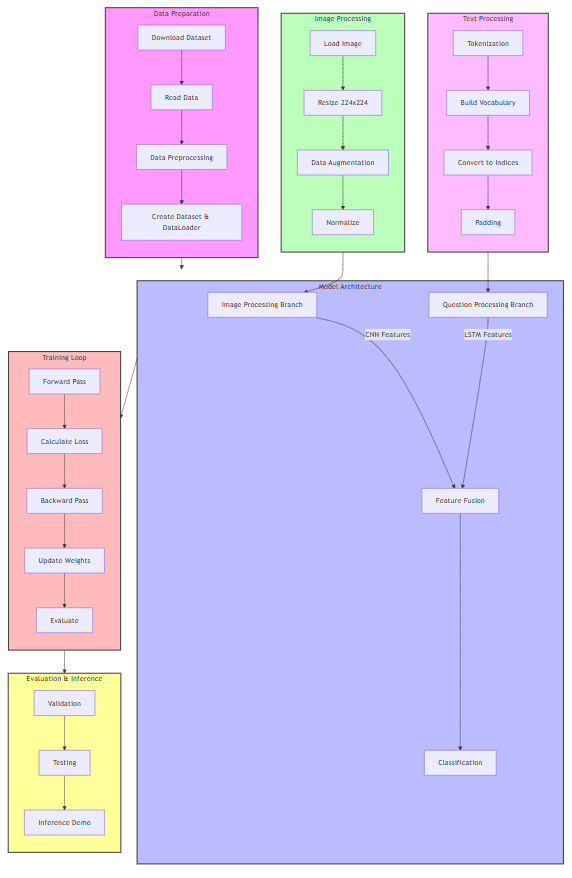

# ***TỔNG QUAN DỰ ÁN VISUAL QUESTION ANSWERING (VQA)***

In [ ]:
"""
# TỔNG QUAN DỰ ÁN VISUAL QUESTION ANSWERING (VQA)

TỔNG QUAN DỰ ÁN:
---------------
- Mục tiêu: Xây dựng mô hình AI trả lời câu hỏi về nội dung của ảnh
- Framework: PyTorch
- Kiến trúc: CNN + LSTM + Fully Connected layers

INPUT/OUTPUT:
-----------
Input:
- Ảnh (RGB image): shape (3, 224, 224), normalized
- Câu hỏi (text): được tokenize và padding thành fixed length

Output:
- Câu trả lời (classification): một trong các câu trả lời định trước

## Kiến trúc mô hình
1. Image Encoder (CNN - ResNet18):
   - Input: Ảnh RGB (3x224x224)
   - Output: Feature vector (512-d)

2. Question Encoder (LSTM):
   - Input: Câu hỏi được tokenize
   - Output: Hidden state vector (256-d)

3. Fusion & Classification:
   - Kết hợp features từ ảnh và câu hỏi
   - FC layers để phân loại câu trả lời

GIẢI THUẬT & CƠ SỞ TOÁN HỌC:
---------------------------
1. Image Processing (CNN - ResNet18):
   - Convolution: f(x) = Σ(w * x + b)
   - Feature maps: từ (3,224,224) -> (512,7,7) -> 512-d vector

2. Question Processing (LSTM):
   - Forget gate: ft = σ(Wf·[ht−1,xt] + bf)
   - Input gate: it = σ(Wi·[ht−1,xt] + bi)
   - Output gate: ot = σ(Wo·[ht−1,xt] + bo)
   - Cell state: Ct = ft * Ct−1 + it * tanh(Wc·[ht−1,xt] + bc)

3. Feature Fusion:
   - Concatenation: [CNN_features, LSTM_features]
   - Fully Connected: W * [features] + b

4. Training:
   - Loss: Cross Entropy = -Σ y_true * log(y_pred)
   - Optimization: Adam with learning rate scheduling

Framework & thư viện:
---------------------------
- PyTorch: Deep learning framework
- torchvision: Xử lý ảnh và models
- torchtext: Xử lý text
- timm: Pretrained models
"""

# **Khắc phục việc cài đặt lại sau mỗi phiên làm việc, Google Colab có tính năng lưu trữ các tệp trong Google Drive -> Thực tế quá chậm không hợp, chỉ nên để lưu parameter best.**

 Bạn có thể tận dụng tính năng này để lưu trữ các thư viện đã cài đặt và sử dụng lại chúng trong các phiên làm việc tiếp theo.

Cách thực hiện:

1. Tạo một thư mục trong Google Drive để lưu trữ các thư viện (ví dụ: colab_libraries). Cài đặt các thư viện vào thư mục đó:

!pip install --target=/content/drive/MyDrive/colab_libraries timm==0.8.17.dev0

!pip install --target=/content/drive/MyDrive/colab_libraries torchtext==0.15.1
...

2. Thêm đường dẫn đến thư mục đó vào sys.path:

import sys
sys.path.append('/content/drive/MyDrive/colab_libraries')

Bằng cách này, bạn chỉ cần cài đặt các thư viện một lần và có thể sử dụng lại chúng trong các phiên làm việc tiếp theo mà không cần cài đặt lại.

Tôi hy vọng những thông tin này sẽ hữu ích cho bạn. Hãy cho tôi biết nếu bạn có bất kỳ câu hỏi nào khác.

In [ ]:
# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ===== 0. Download dataset =====
# Tải dataset từ Google Drive bằng gdown
# - --id: ID của file trên Drive
# - --output: Đường dẫn + tên file zip khi lưu xuống
!gdown --id 1kc6XNqHZJg27KeBuoAoYj70_1rT92191 \
       --output '/content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/data/vqa_coco_dataset.zip'

# Giải nén dataset
# - -q: chế độ yên lặng (không hiện quá nhiều log)
# - -d: chỉ định thư mục đích để giải nén
!unzip -q '/content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/data/vqa_coco_dataset.zip' \
         -d '/content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1kc6XNqHZJg27KeBuoAoYj70_1rT92191
From (redirected): https://drive.google.com/uc?id=1kc6XNqHZJg27KeBuoAoYj70_1rT92191&confirm=t&uuid=d492d464-8c21-4f62-af74-17e2e120fafc
To: /content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/data/vqa_coco_dataset.zip
100% 196M/196M [00:05<00:00, 39.0MB/s]


In [1]:
# ===== 0. Download dataset =====
# Download dataset từ Google Drive
!gdown 1kc6XNqHZJg27KeBuoAoYj70_1rT92191 # Loại bỏ vì không cần --id

# Giải nén dataset
!unzip -q vqa_coco_dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1kc6XNqHZJg27KeBuoAoYj70_1rT92191
From (redirected): https://drive.google.com/uc?id=1kc6XNqHZJg27KeBuoAoYj70_1rT92191&confirm=t&uuid=3b165a2a-a382-46aa-9345-3fe0170ef7a9
To: /content/vqa_coco_dataset.zip
100% 196M/196M [00:03<00:00, 49.2MB/s]


In [2]:
# Cài đặt các thư viện cần thiết
!pip install timm==0.8.17.dev0
!pip install torchtext==0.15.1
!pip install torchvision==0.16.0
!pip install torchaudio==2.1.0
!pip install torch==2.1.0
!pip install transformers==4.27.1



# # Cài đặt các thư viện cần thiết (cài vào drive đã thử, quá chậm không ổn)
# !pip install --target='/content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/colab_libraries' timm==0.8.17.dev0
# !pip install --target='/content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/colab_libraries' torchtext==0.15.1
# !pip install --target='/content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/colab_libraries' torchvision==0.16.0
# !pip install --target='/content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/colab_libraries' torchaudio==2.1.0
# !pip install --target='/content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/colab_libraries' torch==2.1.0
# !pip install --target='/content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/colab_libraries' transformers==4.27.1

# import sys

# target_library_drive = '/content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/colab_libraries'
# sys.path.append(target_library_drive)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 1.0.12
    Uninstalling timm-1.0.12:
      Successfully uninstalled timm-1.0.12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.8

In [3]:
# ===== 1. Import libraries and set random seed =====
# Cài đặt các thư viện cần thiết
#!pip install timm==0.8.17.dev0
#!pip install torchtext==0.15.1
#!pip install torchvision==0.16.0
#!pip install torchaudio==2.1.0
#!pip install torch==2.1.0
#!pip install transformers==4.27.1

# Import các thư viện cần thiết
import torch  # Framework deep learning chính
import torch.nn as nn  # Các layer neural network
import torchtext  # Xử lý text
import os
import random
import numpy as np
import pandas as pd
import spacy  # Thư viện NLP cho tokenize
import timm  # Thư viện chứa các pretrained models
import matplotlib.pyplot as plt

from PIL import Image  # Xử lý ảnh
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchvision import transforms

# Hàm set seed để đảm bảo reproducibility
def set_seed(seed):
    """
    Thiết lập seed cho tất cả các quá trình random
    Args:
        seed (int): Giá trị seed
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed = 59
set_seed(seed)


In [4]:
# ===== 2. DATA Image - from dataset =====
# ===== DATA PROCESSING =====
# Xử lý và chuẩn bị dữ liệu
# Các thành phần chính:
# - Đọc dữ liệu
# - Tokenization
# - Vocabulary building
# - Dataset creation

# Function to read and process data from file
def read_data(file_path):
    """
    Read and process data from text file

    Args:
        file_path (str): Path to data file

    Returns:
        list: List<dicts>, dict = {'image_path': ,'question':, 'answer': }
    """
    data = []
    with open(file_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            temp = line.split('\t')
            qa = temp[1].split('?')

            # Handle cases with multiple question marks
            if len(qa) == 3:
                answer = qa[2].strip()
            else:
                answer = qa[1].strip()

            data_sample = {
                'image_path': temp[0][:-2],
                'question': qa[0] + '?',
                'answer': answer
            }
            data.append(data_sample)
    return data

# Read training, validation and test data
train_data = read_data('vaq2.0.TrainImages.txt')
val_data = read_data('vaq2.0.DevImages.txt')
test_data = read_data('vaq2.0.TestImages.txt')

print("train_data[0]", type(train_data[0]), train_data[0], end='\n')
print("val_data[0]", type(val_data[0]), val_data[0], end='\n')
print("test_data[0]", type(test_data[0]), test_data[0])



train_data[0] <class 'dict'> {'image_path': 'COCO_val2014_000000393225.jpg', 'question': 'Is this a creamy soup ?', 'answer': 'no'}
val_data[0] <class 'dict'> {'image_path': 'COCO_val2014_000000262175.jpg', 'question': 'Is this a designer tie ?', 'answer': 'no'}
test_data[0] <class 'dict'> {'image_path': 'COCO_val2014_000000262162.jpg', 'question': 'Are there any boxes in the room ?', 'answer': 'no'}


In [ ]:
# # ===== 2. DATA Image - from dataset =====
# # Đọc dữ liệu từ file vaq2.0.TrainImages.txt -> list<dict> với dict = {'image_path': ,'question':, 'answer': }
# train_data = []
# train_set_path = 'vaq2.0.TrainImages.txt'

# with open(train_set_path, "r") as f:
#     lines = f.readlines()
#     for line in lines:
#         # Tách thông tin ảnh và QA
#         temp = line.split('\t')
#         qa = temp[1].split('?')

#         # Xử lý trường hợp có nhiều dấu ?
#         if len(qa) == 3:
#             answer = qa[2].strip()
#         else:
#             answer = qa[1].strip()

#         # Tạo mẫu dữ liệu
#         data_sample = {
#             'image_path': temp[0][:-2],  # Đường dẫn ảnh
#             'question': qa[0] + '?',      # Câu hỏi
#             'answer': answer              # Câu trả lời
#         }
#         train_data.append(data_sample)


# print("train_data[0]", type(train_data[0]), train_data[0])

train_data[0] <class 'dict'> {'image_path': 'COCO_val2014_000000393225.jpg', 'question': 'Is this a creamy soup ?', 'answer': 'no'}


In [5]:
# ===== 3. Data TEXT - Preprocessing =====
# Load model tiếng Anh của spaCy để tokenize
# en_core_web_sm: Mô hình ngôn ngữ tiếng Anh cỡ nhỏ.
# en_core_web_md: Mô hình ngôn ngữ tiếng Anh cỡ trung bình.
# en_core_web_lg: Mô hình ngôn ngữ tiếng Anh cỡ lớn.
# de_core_news_sm: Mô hình ngôn ngữ tiếng Đức cỡ nhỏ.
# es_core_news_sm: Mô hình ngôn ngữ tiếng Tây Ban Nha cỡ nhỏ.
# fr_core_news_sm: Mô hình ngôn ngữ tiếng Pháp cỡ nhỏ.


# ===== 3. Data TEXT - Preprocessing =====
# Load model tiếng Anh của spaCy để tokenize
nlp_eng = spacy.load("en_core_web_sm")

def get_tokens(data_iter):
    """
    Generator function để lấy tokens từ 'question', trong train_data của dataset_iput(câu hỏi)
    Args:
        data_iter: Iterator chứa các mẫu dữ liệu
    Yields:
        list: Danh sách các token từ câu hỏi
    """
    for sample in data_iter:
        question = sample['question']
        yield [token.text for token in nlp_eng.tokenizer(question)]

# Xây dựng vocabulary từ iterator (các câu hỏi) -> list câu hỏi
# Hàm  build_vocab_from_iterator() thư viện torchtext
#  input: iterator, có iterator.next() = token hoặc list<tokens>
#         iterator tương thích: Generator (bởi yield); List; Tuple; Iterator từ các thư viện xử lý ngôn ngữ tự nhiên như spaCy, NLTK

vocab = build_vocab_from_iterator(
    get_tokens(train_data), # 	Iterator trả về các token # get_tokens -> yield, giúp tùy chỉnh
    min_freq=2,  # Chỉ giữ từ xuất hiện ít nhất 2 lần
    specials=['<pad>', '<sos>', '<eos>', '<unk>'],  # Special tokens
    special_first=True
)

# token_default, khi token không có trong vocabulary, thì token = <unk> và được gán chỉ số của token <unk>
vocab.set_default_index(vocab['<unk>'])

def tokenize(question, max_seq_len):
    """
    Chuyển câu hỏi thành chuỗi các index trong vocabulary
    Args:
        question (str): Câu hỏi cần tokenize
        max_seq_len (int): Độ dài tối đa của chuỗi token
    Returns:
        list: Chuỗi các index đã được padding/cắt về độ dài max_seq_len
    """
    # Tokenize câu hỏi thành list các token  -> chuyển thành number tương ứng trong vocab
    tokens = [token.text for token in nlp_eng.tokenizer(question)]
    sequence = [vocab[token] for token in tokens] # Chuyển tokens thành indices từ vocabulary

    # Padding hoặc cắt chuỗi về độ dài cố định
    if len(sequence) < max_seq_len:
        sequence += [vocab['<pad>']] * (max_seq_len - len(sequence))
    else:
        sequence = sequence[:max_seq_len]
    return sequence

def detokenize(sequence):
    """
    Chuyển chuỗi index thành câu hỏi gốc
    Args:
        sequence (list): Chuỗi các index từ vocabulary
    Returns:
        str: Câu hỏi được khôi phục
    """
    idx_to_token = vocab.get_itos()
    # Bỏ qua các special token khi chuyển về text
    tokens = [idx_to_token[idx] for idx in sequence
             if idx_to_token[idx] not in ['<pad>', '<sos>', '<eos>', '<unk>']]
    return " ".join(tokens)

# Xây dựng mapping giữa label và index, của classes
classes = set([sample['answer'] for sample in train_data])
label2idx = {cls_name: idx for idx, cls_name in enumerate(classes)}
idx2label = {idx: cls_name for idx, cls_name in enumerate(classes)}

#====================================Check==========================
# Kiểm tra hàm get_tokens
for i, tokens in enumerate(get_tokens(train_data[:2])): # Kiểm tra 5 mẫu đầu tiên
    print(f"Câu hỏi {i}: {train_data[i]['question']}")
    print(f"Tokens: {tokens}")

# Kiểm tra hàm tokenize
question = train_data[0]['question']
max_seq_len = 20
sequence = tokenize(question, max_seq_len)
print(f"\ntrain_data[0]. Câu hỏi: {question}")
print(f"Sequence: {sequence}")

# Kiểm tra hàm detokenize (chưa hoàn thiện)
detokenized_question = detokenize(sequence)
print(f"Detokenized question: {detokenized_question}")


Câu hỏi 0: Is this a creamy soup ?
Tokens: ['Is', 'this', 'a', 'creamy', 'soup', '?']
Câu hỏi 1: Is this person wearing a tie ?
Tokens: ['Is', 'this', 'person', 'wearing', 'a', 'tie', '?']

train_data[0]. Câu hỏi: Is this a creamy soup ?
Sequence: [6, 5, 7, 1168, 575, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Detokenized question: Is this a creamy soup ?


In [6]:
# ===== 4. Create Pytorch dataset =====
class VQADataset(Dataset):
    """
    Custom Dataset class for VQA task

    Attributes:
        data (list): List of data samples
        label2idx (dict): Mapping from answer text to label index
        max_seq_len (int): Maximum sequence length for questions
        transform (callable): Image transformations
        img_dir (str): Directory containing images
    """
    def __init__(self, data, label2idx, max_seq_len=20,
                 transform=None, img_dir='val2014-resised/'):
        self.data = data
        self.label2idx = label2idx
        self.max_seq_len = max_seq_len
        self.transform = transform
        self.img_dir = img_dir

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        """
        Get a single sample from dataset

        Args:
            index (int): Index of sample

        Returns:
            tuple: (image_tensor, question_tensor, label_index)
                - image_tensor: shape (3, 224, 224)
                - question_tensor: shape (max_seq_len,)
                - label_index: scalar
        """
        # Get sample data
        sample = self.data[index]

        # Process image
        img_path = os.path.join(self.img_dir, sample['image_path'])
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        # Process question
        question = tokenize(sample['question'], self.max_seq_len)
        question = torch.tensor(question, dtype=torch.long)

        # Get label
        label = self.label2idx[sample['answer']]
        label = torch.tensor(label, dtype=torch.long)

        return image, question, label

# Định nghĩa các transform cho ảnh
data_transform = {
    'train': transforms.Compose([
        transforms.Resize(size=(224, 224)),  # Resize về kích thước chuẩn cho CNN
        transforms.CenterCrop(size=180),     # Crop ảnh từ center
        # Data augmentation cho training
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
        transforms.RandomHorizontalFlip(),   # Lật ảnh ngẫu nhiên
        transforms.GaussianBlur(3),          # Làm mờ Gaussian
        transforms.ToTensor(),               # Chuyển sang tensor [0,1]
        # Normalize theo ImageNet stats
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]),
    'val': transforms.Compose([
        transforms.Resize(size=(224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])
}

# Khởi tạo các dataset
train_dataset = VQADataset(
    train_data,
    label2idx=label2idx,
    transform=data_transform['train']
)
val_dataset = VQADataset(
    val_data,
    label2idx=label2idx,
    transform=data_transform['val']
)
test_dataset = VQADataset(
    test_data,
    label2idx=label2idx,
    transform=data_transform['val']
)

# Khởi tạo DataLoader
train_batch_size = 256
test_batch_size = 32

train_loader = DataLoader(
    train_dataset,
    batch_size=train_batch_size,
    shuffle=True  # Shuffle data trong quá trình training
)
val_loader = DataLoader(
    val_dataset,
    batch_size=test_batch_size,
    shuffle=False
)
test_loader = DataLoader(
    test_dataset,
    batch_size=test_batch_size,
    shuffle=False
)


In [8]:
#text: 5. Create VQA model

class VQAModel(nn.Module):
    """
    VQA Model combining CNN for image and LSTM for question processing

    Architecture:
        1. Image Branch: CNN (ResNet18) -> Image features
        2. Question Branch: Embedding -> LSTM -> Question features
        3. Fusion: Concatenate features
        4. Classification: FC layers -> Answer probabilities

    Args:
        n_classes (int): Number of possible answers
        img_model_name (str): Name of pretrained CNN model
        embeddding_dim (int): Dimension of word embeddings
        n_layers (int): Number of LSTM layers
        hidden_size (int): Number of hidden units in LSTM
        drop_p (float): Dropout probability
    """
    def __init__(self, n_classes, img_model_name, embeddding_dim,
                 n_layers=2, hidden_size=256, drop_p=0.2):
        super(VQAModel, self).__init__()

        # Image encoder (CNN)
        self.image_encoder = timm.create_model(
            img_model_name,
            pretrained=True,
            num_classes=hidden_size
        )

        # Question encoder
        self.embedding = nn.Embedding(len(vocab), embeddding_dim)
        self.lstm = nn.LSTM(
            input_size=embeddding_dim,
            hidden_size=hidden_size,
            num_layers=n_layers,
            batch_first=True,
            bidirectional=True,
            dropout=drop_p if n_layers > 1 else 0
        )

        # Fusion and classification layers
        self.fc1 = nn.Linear(hidden_size * 3, hidden_size)
        self.dropout = nn.Dropout(drop_p)
        self.gelu = nn.GELU()
        self.fc2 = nn.Linear(hidden_size, n_classes)

    def forward(self, img, text):
        """
        Forward pass of the model

        Args:
            img (torch.Tensor): Batch of images [batch_size, 3, 224, 224]
            text (torch.Tensor): Batch of tokenized questions [batch_size, seq_len]

        Returns:
            torch.Tensor: Class logits [batch_size, n_classes]
        """
        # Process image through CNN
        img_features = self.image_encoder(img)  # [batch_size, hidden_size]

        # Process question through LSTM
        text_emb = self.embedding(text)  # [batch_size, seq_len, embedding_dim]
        lstm_out, _ = self.lstm(text_emb)  # [batch_size, seq_len, 2*hidden_size]
        lstm_out = lstm_out[:, -1, :]  # Take last hidden state [batch_size, 2*hidden_size]

        # Combine features
        combined = torch.cat((img_features, lstm_out), dim=1)

        # Classification
        x = self.fc1(combined)
        x = self.gelu(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x



In [9]:
#text: 6. Training Functions

def evaluate(model, dataloader, criterion, device):
    """
    Evaluate model on validation/test set

    Args:
        model (nn.Module): Model to evaluate
        dataloader (DataLoader): DataLoader for validation/test data
        criterion: Loss function
        device: Device to run evaluation on

    Returns:
        tuple: (average_loss, accuracy)
    """
    model.eval()
    correct = 0
    total = 0
    losses = []

    with torch.no_grad():
        for image, question, labels in dataloader:
            # Move data to device
            image = image.to(device)
            question = question.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(image, question)
            loss = criterion(outputs, labels)
            losses.append(loss.item())

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = sum(losses) / len(losses)
    accuracy = correct / total

    return avg_loss, accuracy

def fit(model, train_loader, val_loader, criterion, optimizer, scheduler, device, epochs):
    """
    Main training loop

    Args:
        model (nn.Module): Model to train
        train_loader (DataLoader): Training data loader
        val_loader (DataLoader): Validation data loader
        criterion: Loss function
        optimizer: Optimizer for updating weights
        scheduler: Learning rate scheduler
        device: Device to run training on
        epochs (int): Number of epochs to train

    Returns:
        tuple: (training_losses, validation_losses)
    """
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        batch_train_losses = []

        # Training phase
        model.train()
        for idx, (images, questions, labels) in enumerate(train_loader):
            # Move data to device
            images = images.to(device)
            questions = questions.to(device)
            labels = labels.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(images, questions)
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            batch_train_losses.append(loss.item())

        # Calculate average training loss
        train_loss = sum(batch_train_losses) / len(batch_train_losses)
        train_losses.append(train_loss)

        # Validation phase
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)
        val_losses.append(val_loss)

        print(f'EPOCH {epoch + 1}:\tTrain loss: {train_loss:.4f}\tVal loss: {val_loss:.4f}\tVal Acc: {val_acc}')

        # Update learning rate
        scheduler.step()

    return train_losses, val_losses

In [10]:
#text: 7. Model Training and Evaluation

# Initialize model and hyperparameters
n_classes = len(classes)
img_model_name = 'resnet18'
hidden_size = 256
n_layers = 2
embeddding_dim = 128
drop_p = 0.2
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Create model instance
model = VQAModel(
    n_classes=n_classes,
    img_model_name=img_model_name,
    embeddding_dim=embeddding_dim,
    n_layers=n_layers,
    hidden_size=hidden_size,
    drop_p=drop_p
).to(device)

# Training hyperparameters
lr = 1e-3  # Learning rate
epochs = 50
scheduler_step_size = epochs * 0.8  # Reduce LR (Learing Rate) after 80% of epochs

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=lr
)
scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=scheduler_step_size,
    gamma=0.1  # Reduce LR (Learing Rate) by factor of 10%
)

# Train the model
print("Starting training...")
train_losses, val_losses = fit(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    scheduler,
    device,
    epochs
)



Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


Starting training...
EPOCH 1:	Train loss: 0.6988	Val loss: 0.8500	Val Acc: 0.49385245901639346
EPOCH 2:	Train loss: 0.6951	Val loss: 0.7212	Val Acc: 0.538422131147541
EPOCH 3:	Train loss: 0.6950	Val loss: 0.7004	Val Acc: 0.5076844262295082
EPOCH 4:	Train loss: 0.6920	Val loss: 0.6918	Val Acc: 0.5322745901639344
EPOCH 5:	Train loss: 0.6920	Val loss: 0.7030	Val Acc: 0.5358606557377049
EPOCH 6:	Train loss: 0.6924	Val loss: 0.6916	Val Acc: 0.5379098360655737
EPOCH 7:	Train loss: 0.6924	Val loss: 0.6936	Val Acc: 0.5220286885245902
EPOCH 8:	Train loss: 0.6913	Val loss: 0.6912	Val Acc: 0.5184426229508197
EPOCH 9:	Train loss: 0.6920	Val loss: 0.6903	Val Acc: 0.5297131147540983
EPOCH 10:	Train loss: 0.6926	Val loss: 0.6965	Val Acc: 0.5358606557377049
EPOCH 11:	Train loss: 0.6915	Val loss: 0.6901	Val Acc: 0.5189549180327869
EPOCH 12:	Train loss: 0.6900	Val loss: 0.6891	Val Acc: 0.5404713114754098
EPOCH 13:	Train loss: 0.6896	Val loss: 0.6906	Val Acc: 0.5230532786885246
EPOCH 14:	Train loss: 0.68

In [13]:
# //---8---//===== SAVE & MODEL WEIGHTS =====
# Lưu và load trọng số mô hình  # Sử dụng Google Drive để lưu trữ

from google.colab import drive
import os

def check_google_drive_connection():
    # Kiểm tra xem đã gắn kết thư mục Google Drive chưa
    if os.path.exists('/content/drive/My Drive'):
        print("Google Drive đã được kết nối.")
        return True
    else:
        print("Kết nối Google Drive.")
        drive.mount('/content/drive') # Kết nối Google Drive
        print("Đã kết nối Google Drive thành công.")

        # # Hỏi người dùng có muốn kết nối hay không
        # user_input = input("Bạn có muốn kết nối Google Drive không? (y/n): ").lower()
        # if user_input == 'y':
        #     # Kết nối Google Drive
        #     drive.mount('/content/drive')
        #     print("Đã kết nối Google Drive thành công.")
        #     return True
        # else:
        #     print("Không kết nối Google Drive.")
        #     return False

# Gọi hàm kiểm tra
if check_google_drive_connection():
    print("Thực hiện bước tiếp theo...") # Thực hiện các bước tiếp theo khi Google Drive đã kết nối



Google Drive đã được kết nối.
Thực hiện bước tiếp theo...


In [14]:
def save_model(model, save_path):
    """
    Lưu trọng số mô hình lên Google Drive

    Args:
        model (nn.Module): Mô hình đã train
        save_path (str): Đường dẫn để lưu trên Drive
    """
    # Mount Google Drive
    # drive.mount('/content/drive')

    # Tạo thư mục nếu chưa tồn tại
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Lưu model weights
    torch.save(model.state_dict(), save_path)
    print(f'Đã lưu model weights tại: {save_path}')

# Ví dụ sử dụng:
# Sau khi train xong, lưu model:
save_path = '/content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/best_weight/vqa_weights.pth'
save_model(model, save_path)

Đã lưu model weights tại: /content/drive/MyDrive/AIO_2024/AIO_MODUN_06/M6W5.6. VQA_CNN_LSTM/best_weight/vqa_weights.pth


In [ ]:
# ===== LOAD MODEL WEIGHTS =====
def load_model(model, weights_path):
    """
    Load trọng số mô hình từ Google Drive

    Args:
        model (nn.Module): Mô hình cần load weights
        weights_path (str): Đường dẫn đến file weights trên Drive

    Returns:
        model: Mô hình đã load weights
    """
    # # Mount Google Drive
    # drive.mount('/content/drive')

    # Load weights
    model.load_state_dict(torch.load(weights_path))
    return model

# Ví dụ sử dụng:

# Khi cần dùng lại trọng số đã train và lưu, load model:
model = VQAModel(
    n_classes=n_classes,
    img_model_name='resnet18',
    embedding_dim=128,
    n_layers=2,
    hidden_size=256,
    drop_p=0.2
).to(device)

weights_path = '/content/drive/MyDrive/path_bestpt/vqa_weights.pth'
model = load_model(model, weights_path)
model.eval()  # Chuyển sang chế độ inference

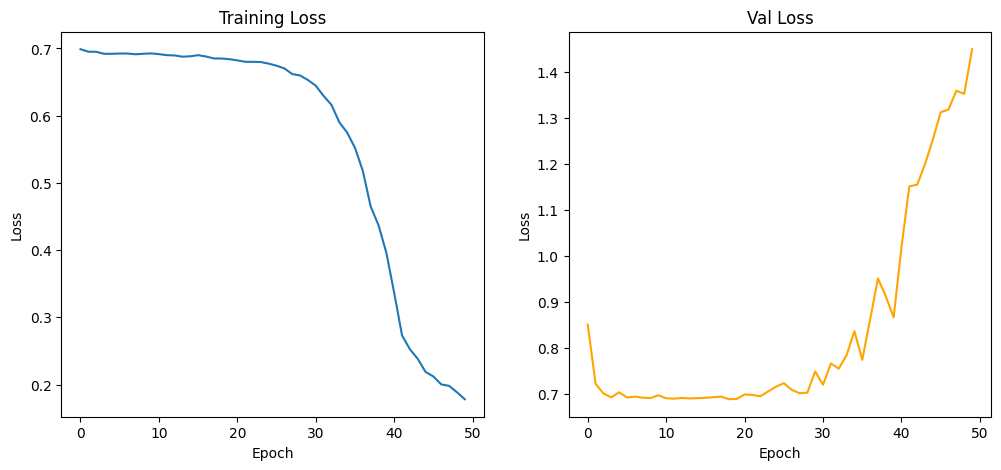


Final Evaluation:
Validation accuracy: 0.5122950819672131
Test accuracy: 0.5079129574678536

Demo Inference:
Question: Is this a pizza ?
True Answer: yes
Predicted Answer: no


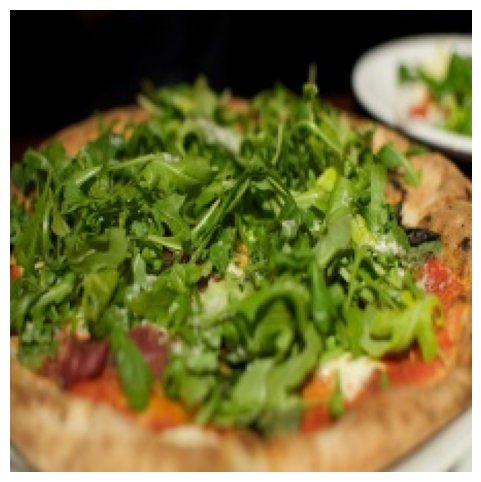

'\nNOTES:\n------\n1. Model Performance:\n   - Training loss and validation loss should converge\n   - Final accuracy depends on dataset complexity\n\n2. Improvements:\n   - Try different CNN architectures (ResNet50, EfficientNet)\n   - Experiment with attention mechanisms\n   - Use more sophisticated fusion methods\n   - Implement data augmentation techniques\n\n3. Limitations:\n   - Limited by predefined answer set\n   - May struggle with complex reasoning\n   - Requires large dataset for good performance\n'

In [15]:
#text: 8. Visualization and Final Evaluation

def plot_training_curves(train_losses, val_losses):
    """
    Plot training and validation loss curves

    Args:
        train_losses (list): Training losses per epoch
        val_losses (list): Validation losses per epoch
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot training loss
    ax[0].plot(train_losses)
    ax[0].set_title('Training Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')

    # Plot validation loss
    ax[1].plot(val_losses, color='orange')
    ax[1].set_title('Val Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')

    plt.show()

# Plot training curves
plot_training_curves(train_losses, val_losses)

# Evaluate on validation and test sets
print("\nFinal Evaluation:")
val_loss, val_acc = evaluate(model, val_loader, criterion, device)
test_loss, test_acc = evaluate(model, test_loader, criterion, device)

print('Validation accuracy:', val_acc)
print('Test accuracy:', test_acc)

#text: 9. Inference Function

def inference(model, image_path, question, transform, max_seq_len=20):
    """
    Perform inference on a single image-question pair

    Args:
        model (nn.Module): Trained VQA model
        image_path (str): Path to image file
        question (str): Question about the image
        transform: Image transformation pipeline
        max_seq_len (int): Maximum sequence length for question

    Returns:
        str: Predicted answer
    """
    model.eval()

    # Process question
    question_tokens = torch.tensor(
        tokenize(question, max_seq_len)
    ).unsqueeze(0).to(device)  # Add batch dimension

    # Process image
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Get prediction
    with torch.no_grad():
        output = model(image, question_tokens)
        pred_idx = torch.argmax(output, dim=1).item()
        predicted_answer = idx2label[pred_idx]

    return predicted_answer

# Example inference
def demo_inference(idx=22):
    """
    Demonstrate inference on a sample from test set

    Args:
        idx (int): Index of test sample to use
    """
    # Get sample data
    sample = test_data[idx]
    img_path = os.path.join('val2014-resised', sample['image_path'])
    question = sample['question']
    true_answer = sample['answer']

    # Perform inference
    pred_answer = inference(
        model,
        img_path,
        question,
        data_transform['val']
    )

    # Display results
    print(f'Question: {question}')
    print(f'True Answer: {true_answer}')
    print(f'Predicted Answer: {pred_answer}')

    # Show image
    img = Image.open(img_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Run demo
print("\nDemo Inference:")
demo_inference()

"""
NOTES:
------
1. Model Performance:
   - Training loss and validation loss should converge
   - Final accuracy depends on dataset complexity

2. Improvements:
   - Try different CNN architectures (ResNet50, EfficientNet)
   - Experiment with attention mechanisms
   - Use more sophisticated fusion methods
   - Implement data augmentation techniques

3. Limitations:
   - Limited by predefined answer set
   - May struggle with complex reasoning
   - Requires large dataset for good performance
"""

In [ ]:
# ===== EARLY STOPPING =====
# Implement early stopping để tránh overfitting
# Theo dõi validation loss và dừng khi không cải thiện

class EarlyStopping:
    """
    Early stopping để dừng training khi model bắt đầu overfitting

    Args:
        patience (int): Số epochs chờ trước khi dừng khi model không cải thiện
        min_delta (float): Ngưỡng tối thiểu để coi là cải thiện
        mode (str): 'min' cho loss, 'max' cho metrics như accuracy

    Example:
        early_stopping = EarlyStopping(patience=5, min_delta=0.01)
        for epoch in range(epochs):
            train()
            val_loss = validate()
            if early_stopping(val_loss):
                print("Early stopping triggered")
                break
    """
    def __init__(self, patience=5, min_delta=0.01, mode='min'):
        self.patience = patience
        self.min_delta = min_delta
        self.mode = mode
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.min_delta *= 1 if mode == 'min' else -1

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
            return False

        if self.mode == 'min':
            improve = self.best_loss - val_loss > self.min_delta
        else:
            improve = val_loss - self.best_loss > self.min_delta

        if improve:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                print(f'\nEarly stopping triggered after {self.counter} epochs without improvement')
                return True

        return False

# Sửa lại hàm fit để thêm early stopping:
def fit(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    scheduler,
    device,
    epochs,
    patience=5,
    min_delta=0.01
):
    """
    Training loop với early stopping

    Args:
        model: Model cần train
        train_loader: DataLoader cho training data
        val_loader: DataLoader cho validation data
        criterion: Loss function
        optimizer: Optimizer
        scheduler: Learning rate scheduler
        device: Device để train ('cuda' hoặc 'cpu')
        epochs: Số epochs tối đa
        patience: Số epochs chờ trước khi early stop
        min_delta: Ngưỡng cải thiện tối thiểu
    """
    train_losses = []
    val_losses = []

    # Khởi tạo early stopping
    early_stopping = EarlyStopping(
        patience=patience,
        min_delta=min_delta,
        mode='min'  # Theo dõi validation loss
    )

    for epoch in range(epochs):
        # Training phase
        batch_train_losses = []
        model.train()

        for idx, (images, questions, labels) in enumerate(train_loader):
            images = images.to(device)
            questions = questions.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images, questions)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            batch_train_losses.append(loss.item())

        # Calculate epoch metrics
        train_loss = sum(batch_train_losses) / len(batch_train_losses)
        train_losses.append(train_loss)

        # Validation phase
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)
        val_losses.append(val_loss)

        # Print progress
        print(f'EPOCH {epoch + 1}:')
        print(f'\tTrain loss: {train_loss:.4f}')
        print(f'\tVal loss: {val_loss:.4f}')
        print(f'\tVal Acc: {val_acc:.4f}')

        # Early stopping check
        if early_stopping(val_loss):
            print(f'Training stopped early at epoch {epoch + 1}')
            break

        scheduler.step()

    return train_losses, val_losses

# Sử dụng trong training:
train_losses, val_losses = fit(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    device=device,
    epochs=50,
    patience=5,  # Dừng sau 5 epochs không cải thiện
    min_delta=0.01  # Ngưỡng cải thiện tối thiểu 1%
)